# Sujet 2 : le pouvoir d'achat des ouvriers anglais du XVIe au XIXe siècle

Nous commençons par importer les données.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import urllib.request

data_url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv"
data_file = "Wheat.csv"

if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

raw_data = pd.read_csv(data_file)
raw_data

rownames  Year  Wheat  Wages
0          1  1565   41.0   5.00
1          2  1570   45.0   5.05
2          3  1575   42.0   5.08
3          4  1580   49.0   5.12
4          5  1585   41.5   5.15
5          6  1590   47.0   5.25
6          7  1595   64.0   5.54
7          8  1600   27.0   5.61
8          9  1605   33.0   5.69
9         10  1610   32.0   5.78
10        11  1615   33.0   5.94
11        12  1620   35.0   6.01
12        13  1625   33.0   6.12
13        14  1630   45.0   6.22
14        15  1635   33.0   6.30
15        16  1640   39.0   6.37
16        17  1645   53.0   6.45
17        18  1650   42.0   6.50
18        19  1655   40.5   6.60
19        20  1660   46.5   6.75
20        21  1665   32.0   6.80
21        22  1670   37.0   6.90
22        23  1675   43.0   7.00
23        24  1680   35.0   7.30
24        25  1685   27.0   7.60
25        26  1690   40.0   8.00
26        27  1695   50.0   8.50
27        28  1700   30.0   9.00
28        29  1705   32.0  10.00
29        30  1710   44.0  11.00
30        31  1715   33.0  11.75
31        32  1720   29.0  12.50
32        33  1725   39.0  13.00
33        34  1730   26.0  13.30
34        35  1735   32.0  13.60
35        36  1740   27.0  14.00
36        37  1745   27.5  14.50
37        38  1750   31.0  15.00
38        39  1755   35.5  15.70
39        40  1760   31.0  16.50
40        41  1765   43.0  17.60
41        42  1770   47.0  18.50
42        43  1775   44.0  19.50
43        44  1780   46.0  21.00
44        45  1785   42.0  23.00
45        46  1790   47.5  25.50
46        47  1795   76.0  27.50
47        48  1800   79.0  28.50
48        49  1805   81.0  29.50
49        50  1810   99.0  30.00
50        51  1815   78.0    NaN
51        52  1820   54.0    NaN
52        53  1821   54.0    NaN

Puis nous regardons si des données sont manquantes.

In [2]:
raw_data[raw_data.isnull().any(axis=1)]

rownames  Year  Wheat  Wages
50        51  1815   78.0    NaN
51        52  1820   54.0    NaN
52        53  1821   54.0    NaN

Il y en a. Nous supprimons les lignes correspondantes.

In [3]:
data = raw_data.dropna().copy()
data

rownames  Year  Wheat  Wages
0          1  1565   41.0   5.00
1          2  1570   45.0   5.05
2          3  1575   42.0   5.08
3          4  1580   49.0   5.12
4          5  1585   41.5   5.15
5          6  1590   47.0   5.25
6          7  1595   64.0   5.54
7          8  1600   27.0   5.61
8          9  1605   33.0   5.69
9         10  1610   32.0   5.78
10        11  1615   33.0   5.94
11        12  1620   35.0   6.01
12        13  1625   33.0   6.12
13        14  1630   45.0   6.22
14        15  1635   33.0   6.30
15        16  1640   39.0   6.37
16        17  1645   53.0   6.45
17        18  1650   42.0   6.50
18        19  1655   40.5   6.60
19        20  1660   46.5   6.75
20        21  1665   32.0   6.80
21        22  1670   37.0   6.90
22        23  1675   43.0   7.00
23        24  1680   35.0   7.30
24        25  1685   27.0   7.60
25        26  1690   40.0   8.00
26        27  1695   50.0   8.50
27        28  1700   30.0   9.00
28        29  1705   32.0  10.00
29        30  1710   44.0  11.00
30        31  1715   33.0  11.75
31        32  1720   29.0  12.50
32        33  1725   39.0  13.00
33        34  1730   26.0  13.30
34        35  1735   32.0  13.60
35        36  1740   27.0  14.00
36        37  1745   27.5  14.50
37        38  1750   31.0  15.00
38        39  1755   35.5  15.70
39        40  1760   31.0  16.50
40        41  1765   43.0  17.60
41        42  1770   47.0  18.50
42        43  1775   44.0  19.50
43        44  1780   46.0  21.00
44        45  1785   42.0  23.00
45        46  1790   47.5  25.50
46        47  1795   76.0  27.50
47        48  1800   79.0  28.50
48        49  1805   81.0  29.50
49        50  1810   99.0  30.00

## Reproduire le graphe de Playfair

On commence par représenter le prix du blé par des barres.

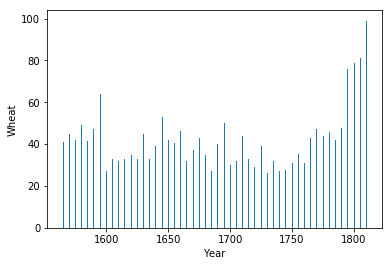

In [4]:
plt.bar(data['Year'],data['Wheat'])
plt.ylabel('Wheat')
plt.xlabel('Year')
plt.show()

Puis on représente les salaires par une surface bleue delimitee par une courbe rouge.

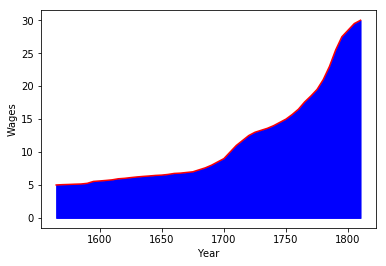

In [5]:
plt.plot( data['Year'],data['Wages'], 'r-')
plt.fill_between(data['Year'],data['Wages'], color='blue')

plt.ylabel('Wages')
plt.xlabel('Year')
plt.show()

Puis on superpose les graphes.

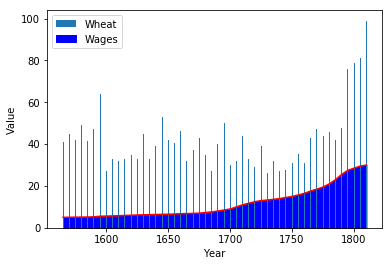

In [6]:
p1 = plt.bar(data['Year'],data['Wheat'])

p2 = plt.plot(data['Year'],data['Wages'], 'r-')
p2 = plt.fill_between(data['Year'],data['Wages'], color='blue')

plt.ylabel('Value')
plt.xlabel('Year')
plt.legend([p1, p2], ["Wheat", "Wages"])
plt.show()

## Amélioration du graphique

On utilise deux axes des ordonnées pour les deux courbes.

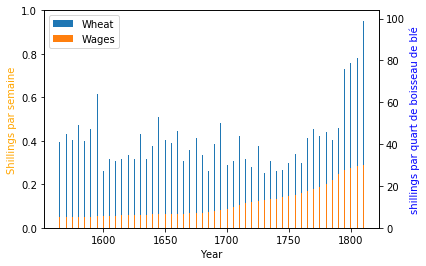

In [7]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Shillings par semaine', color='orange')

ax2 = ax1.twinx()
ax2.set_ylabel('shillings par quart de boisseau de blé', color='blue')

p1 = plt.bar(data['Year'],data['Wheat'])
p2 = plt.bar(data['Year'],data['Wages'])


plt.legend([p1, p2], ["Wheat", "Wages"])
plt.show()

## Etude du pouvoir d'achat

Le pouvoir d'achat est obtenu comme un quotient des revenus sur les prix.

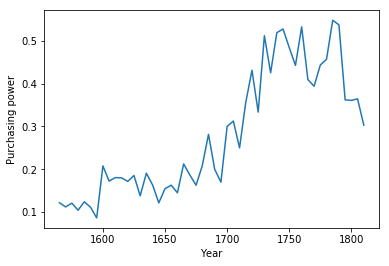

In [8]:
purchasingPower = data['Wages'] / data['Wheat']
plt.plot(data['Year'], purchasingPower)
plt.ylabel('Purchasing power')
plt.xlabel('Year')
plt.show()

Nous pouvons utiliser une nouvelle représentation: salaire et prix sur un même graphe.

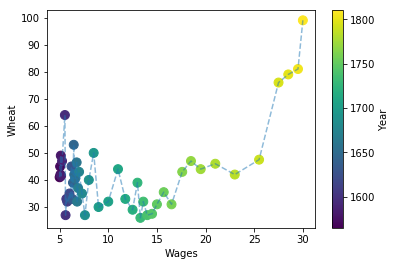

In [9]:
fig, ax = plt.subplots()

# Scatter avec couleurs = années
sc = ax.scatter(data['Wages'], data['Wheat'], 
                c=data['Year'], cmap='viridis', s=80)

# Courbe reliant les points
ax.plot(data['Wages'], data['Wheat'], linestyle='--', alpha=0.5)

ax.set_xlabel("Wages")
ax.set_ylabel("Wheat")

# Barre de couleur pour les années
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Year")

plt.show()

La représentation la plus claire est selon moi celle de Playfair (dans "Amélioration du graphique").